# Estudio estadístico de la empresa MEGALINE

### **Introducción y descripción del proyecto**



Se realizará un estudio estadístico en la empresa de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. 

El departamento comercial quiere saber cuál de los planes genera más ingresos para
ajustar el presupuesto de publicidad.
Se realiza un análisis preliminar de las tarifas basado en una selección de
clientes relativamente pequeña. Se tienen los datos de 500 clientes de Megaline:
quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas
que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el
comportamiento de los clientes y determinar qué tarifa de prepago genera más
ingresos.

**Descripción de las tarifas**

**Nota:** Megaline redondea los segundos a minutos y los megabytes a gigabytes.
Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo
un segundo, se contará como un minuto. Para tráfico web, las sesiones web
individuales no se redondean. En vez de esto, el total del mes se redondea hacia
arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

**Surf**
1. Pago mensual: 20 USD
2. 500 minutos al mes, 50 SMS y 15 GB de datos
3. Si se exceden los límites del paquete:

    a. 1 minuto: 3 centavos

    b. 1 SMS: 3 centavos

    c. 1 GB de datos: 10 USD

**Ultimate**
1. Pago mensual: 70$
2. 3000 minutos al mes, 1000 SMS y 13 GB de datos
3. Si se exceden los límites del paquete:

    a. 1 minuto: 1 centavo

    b. 1 SMS: 1 centavo
    
    c. 1 GB de datos: 7$

Primeramente estudiaremos 5 Data Sets, preprocesando los datos de cada uno, para luego poder formular las hipótesis y en posterior determinar si son correctas o no.

**Descripción de los datos**

Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo
un segundo, se contará como un minuto. Para tráfico web, las sesiones web
individuales no se redondean. En vez de esto, el total del mes se redondea hacia
arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

***La tabla users (datos sobre los usuarios):***

*   user_id — identificador único del usuario
*   first_name — nombre del usuario
*   last_name — apellido del usuario
*   age — edad del usuario (en años)
*   reg_date — fecha de suscripción (dd, mm, aa)
*   churn_date: la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se generaron estos datos)
*   city — ciudad de residencia del usuario
*   plan — nombre de la tarifa

***La tabla calls (datos sobre las llamadas):***
*   id — identificador único de la llamada
*   call_date — fecha de la llamada
*   duration - duración de la llamada (en minutos)
*   user_id — el identificador del usuario que realiza la llamada

***La tabla messages (datos sobre los SMS):***
*   id — identificador único del SMS
*   message_date — fecha del SMS
*   user_id — el identificador del usuario que manda el SMS

***La tabla internet (datos sobre las sesiones web):***
*   id — identificador único de la sesión
*   mb_used: el volumen de datos gastados durante la sesión (en megabytes)
*   session_date — fecha de la sesión web
*   user_id — identificador del usuario

***La tabla plans (datos sobre las tarifas):***
*   plan_name — nombre de la tarifa
*   usd_monthly_fee — pago mensual en dólares estadounidenses
*   minutes_included — minutos incluidos al mes
*   messages_included — SMS incluidos al mes
*   mb_per_month_included — datos incluidos al mes (en megabytes)
*   usd_per_minute — precio por minuto tras exceder los límites del paquete (por
ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
*   usd_per_message — precio por SMS tras exceder los límites del paquete
*   usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

Se importan las librerías necesarias

In [8]:
import pandas as pd
import scipy as sc
from scipy import stats as st
import numpy as np
import math as mt
from math import factorial as fac
import matplotlib.pyplot as plt
import seaborn

A coninuación, se leen los datasets.

In [10]:
#Leyendo archivo que contiene la data de los usuarios
try:
  user = pd.read_csv('/datasets/megaline_users.csv')
except:
  user = pd.read_csv('/content/drive/MyDrive/practicum/Sprint4/megaline_users.csv')

#Leyendo archivo que contiene la data de las llamadas
try:
  call = pd.read_csv('/datasets/megaline_calls.csv')
except:
  call = pd.read_csv('/content/drive/MyDrive/practicum/Sprint4/megaline_calls.csv')

#Leyendo archivo que contiene la data de los SMS
try:
  sms = pd.read_csv('/datasets/megaline_messages.csv')
except:
  sms = pd.read_csv('/content/drive/MyDrive/practicum/Sprint4/megaline_messages.csv')

#Leyendo archivo que contiene la data de las sesiones web
try:
  web = pd.read_csv('/datasets/megaline_internet.csv')
except:
  web = pd.read_csv('/content/drive/MyDrive/practicum/Sprint4/megaline_internet.csv')

#Leyendo archivo que contiene la data de las tarifas
try:
  plans = pd.read_csv('/datasets/megaline_plans.csv')
except:
  plans = pd.read_csv('/content/drive/MyDrive/practicum/Sprint4/megaline_plans.csv')


Se muestran las primeras 5 filas el dataset de los usuarios

In [11]:
user.head()     # Mostramos las 5 primeras filas

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Se muestran las últimaa 5 filas el dataset de los usuarios

In [12]:
user.tail()     # Mostramos las 5 últimas filas

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


Primeramente, estudiamos los datos de los usuarios

In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


En consiuiente transformaremos los datos de la columna `reg_date` y `churn_date` a `datetime64`

In [14]:
user['churn_date'] = pd.to_datetime(user['churn_date'])
user['reg_date'] = pd.to_datetime(user['reg_date'])

Como se observa, solamente hay perida de datos en la columna `churn_date` Sin embargo, esto es debido a que esas personas no hán dejado el servicio. Por lo que se puede decir que 34 si lo han hecho. Es por ello que se cambiarán dichos valores `NAN` por `'active'` significando que aún tiene el servicio

In [15]:
user['churn_date'] = user['churn_date'].fillna('active')

In [16]:
user['churn_date'].unique()

array(['active', Timestamp('2018-12-18 00:00:00'),
       Timestamp('2018-11-16 00:00:00'), Timestamp('2018-09-07 00:00:00'),
       Timestamp('2018-12-30 00:00:00'), Timestamp('2018-10-07 00:00:00'),
       Timestamp('2018-12-31 00:00:00'), Timestamp('2018-11-24 00:00:00'),
       Timestamp('2018-11-11 00:00:00'), Timestamp('2018-12-12 00:00:00'),
       Timestamp('2018-11-14 00:00:00'), Timestamp('2018-12-27 00:00:00'),
       Timestamp('2018-11-29 00:00:00'), Timestamp('2018-12-22 00:00:00'),
       Timestamp('2018-11-30 00:00:00'), Timestamp('2018-10-13 00:00:00'),
       Timestamp('2018-07-31 00:00:00'), Timestamp('2018-12-15 00:00:00'),
       Timestamp('2018-12-19 00:00:00'), Timestamp('2018-10-03 00:00:00'),
       Timestamp('2018-10-22 00:00:00'), Timestamp('2018-08-16 00:00:00'),
       Timestamp('2018-12-26 00:00:00'), Timestamp('2018-09-01 00:00:00'),
       Timestamp('2018-11-21 00:00:00'), Timestamp('2018-08-19 00:00:00'),
       Timestamp('2018-12-10 00:00:00'), Timestam

Ahora podemos discriminar que los usuarios con fecha, es porque dejaron los servicios en l amisma, y los que dicen 'active' continuan con el servicio.

Ahora verificamos, los tipos de dato luego de los cambios 

In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


A continuación se estudia la distribución de los datos en este data frame.

In [18]:
user.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Como podemos ver la edad media de los usuarios está entorno a los 46años, así mismo, la persona má joven tiene 18años y la más anciana 75, con una desviación standar de 17 años.

Se muestran las primeras 5 filas del dataset de las llamadas

In [19]:
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Se muestran las últimas 5 filas del dataset de las llamadas

In [20]:
call.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


A continuación estudiamos los datos de las llamadas

In [21]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


No se evidencia perdida de datos, sin emabargo, es necesario cambiar el tipo de dato de la columna `call_date` para que sea de tipo fecha y no objeto

In [22]:
call['call_date'] = pd.to_datetime(call['call_date'])

Se verifica el cambio de los datos.

In [23]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Ahora se puede estudiar la distribución del dataset.

In [24]:
call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Como se observa, hay un total 137735 llamadas en el periodo de estudio. La duración media de las llamadas es de 7 min, y vemos que la mediana está en torno a los 6min, esto debido claro está a los valores atípicos y a las llamadas que están perdidas. Así mismo la desviación estandar es de unos 6 min más.

Se muestran las primeras 5 filas el dataset de los SMS

In [25]:
sms.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Se muestran las últimas 5 filas el dataset de los SMS

In [26]:
sms.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


Se observan los tipo de datos. 

In [27]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No se evidencia perdida de datos, sin emabargo, es necesario cambiar el tipo de dato de la columna `message_date` para que sea de tipo fecha y no objeto

In [28]:
sms['message_date'] = pd.to_datetime(sms['message_date'])

Comprobando los datos

In [29]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Como se observa, ahora los días son de tipo `datetime64` y no `object` lo que prosigue es analizar el DataFrame con los SMS

En este caso no aplicamos el describe ya que no nos va a ofrecer información releventa debido a la naturaleza d elos daros presntes en este Data Frame

Se muestran las primeras 5 filas del dataset de las sesiones web

In [30]:
web.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Se muestran las últimas 5 filas del dataset de las sesiones web

In [31]:
web.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


Como se observa, ahora los días son de tipo `datetime64` y no `object` lo que prosigue es analizar el DataFrame con los sesiones web

In [32]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


No se evidencia perdida de datos, sin emabargo, es necesario cambiar el tipo de dato de la columna `session_date` para que sea de tipo fecha y no objeto

In [33]:
web['session_date'] = pd.to_datetime(web['session_date'])

Como se 

In [34]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Como se observa, ahora los días son de tipo `datetime64` y no `object` lo que prosigue es analizar con dexcribe los mb utilizados

In [35]:
web.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Como  podemos observar, tenemos un total de 104825 dats registrados. la media de datos de las personas es de 367mb al mes y su mediana es de 343mb al mes, lo que nos habla de la presencia de atípicos. Como podemos ver, la persona que más mega utilizo fueron 1693mb en ese día específico. Y en los datos tenemos una desviación estandar de uno 277.17mb al día.

Se muestra el dataset de los planes

In [36]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Se observa el tipo de datos:

In [37]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


En este caso, no se realiza un describe ya que a simplevista se evidencia que los valores están bien

Se puede decir que en este caso no hay nada que modificar. Sin embargo se procede a aseegurarnos de no tener datos duplicados.

In [38]:
user[user.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [39]:
call[call.duplicated()]

,id,user_id,call_date,duration


In [40]:
sms[sms.duplicated()]

,id,user_id,message_date


In [41]:
web[web.duplicated()]

,id,user_id,session_date,mb_used


### **Preprocesamiento de los datos**


Ahora bien, como se indica en lo mencionado por la empresa, las llamadas siempre deben redondearse a 1 minuto si su duración es inferior a esta y superior a 0, que significa una llamada perdida. Por lo que se procede a estudiar dicha característica.

In [42]:
call[(call['duration'] < 1)&(call['duration'] > 0)]

,id,user_id,call_date,duration
28,1001_23,1001,2018-10-27,0.98
41,1001_46,1001,2018-11-03,0.95
88,1001_137,1001,2018-11-10,0.15
187,1001_336,1001,2018-08-29,0.54
191,1001_341,1001,2018-11-25,0.71
...,...,...,...,...
137648,1499_117,1499,2018-12-05,0.68
137652,1499_121,1499,2018-11-05,0.92
137689,1499_158,1499,2018-12-13,0.40
137727,1499_196,1499,2018-11-22,0.27


Como podemos ver, si hay llamadas de menos de 1 minuto y mayores a 0, por lo que se procede a redondearlas al valor que la empresa exige.

In [43]:
call['duration'] = np.ceil(call['duration'])

In [44]:
call['duration'].min()

0.0

Ahora se procede a redondearla hacia arriba

Como se puede ver, ahora la duración menor es de 1 minuto.

**Conclusión intermedia**

Como se evidencia, se lograron corregir los errores en los datos, referentes a los minutos en las llamadas, en los cuales, habia tiempos inferiores a 1 minuto que debian ser redondeados.

Así mismo, se modificaron los tipos de datos, para que los calculos posteriores resultasen más sencillos.

A continuación se realizará el análisis de los datos como tal

Vamos a calcular la cantiadad de minutos de llamada, megas y sms enviados por mes para cada usuario del caso de estudio y lo guardaremos en una nueva tabla llamada `user_perfil`

Para ello primeramente vamos a buscar estos valores individualemnte para luago agregarlos a la tabla. Es por ello que se crea una función que nos permite obtener el mes de un DF y agregarselo como una nueva columna, para poder trabajar con valores mensuales.

Ahora pasamos la función a las llamadas, mensajes y volumen de datos consumidos y los mostramos.

In [45]:
call['month'] = call['call_date'].dt.month 

In [46]:
sms['month'] = sms['message_date'].dt.month

In [47]:
web['month'] = web['session_date'].dt.month

In [48]:
call.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [49]:
sms.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [50]:
web.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Como se observa, ahora tenemos una columna correspondiente a los meses, la cual nos va a permitir trabajar de manera más comoda los datos.

Ahora vamaos a agrupar de manera que podemos ver el comportamiento de cada usuario cada mes en cuento a mensajes, llamadas y volumnes de datos consumidos.

Para ello vamos a crear 3 tablas pivote:

* `call_month`: que calcula mensualmente por usuario la cantidad de llamadas que realizó y el total de minutos empleados.
* `sms_month`: que calcula mensualmente por usuario la cantidad de sms que envió el mismo.
* `web_month`: que calcula mensualmente por usuario la cantidad de datos en MB que consumió dicho usuario.


In [51]:
call_month = call.pivot_table(index = ['user_id','month'], values = ['duration'], aggfunc = ['count','sum'])  #Obtenemos el número de llamadas y el tiempo total
sms_month = sms.pivot_table(index = ['user_id','month'], values = ['id'], aggfunc = 'count')                  #Obtenemos la cantidad de SMS enviados
web_month = web.pivot_table(index = ['user_id','month'], values = ['mb_used'], aggfunc = ['sum'])             #Obtenemos el volumen da datos enviados en MB

In [52]:
call_month.columns = ['num_call','time_call']
call_month

num_call  time_call
user_id month                     
1000    12           16      124.0
1001    8            27      182.0
        9            49      315.0
        10           65      393.0
        11           64      426.0
...                 ...        ...
1498    12           39      339.0
1499    9            41      346.0
        10           53      385.0
        11           45      308.0
        12           65      496.0

[2258 rows x 2 columns]

In [53]:
sms_month.columns = ['num_sms']
sms_month

num_sms
user_id month         
1000    12          11
1001    8           30
        9           44
        10          53
        11          36
...                ...
1496    9           21
        10          18
        11          13
        12          11
1497    12          50

[1806 rows x 1 columns]

In [54]:
web_month.columns = ['volum_data']
web_month

volum_data
user_id month            
1000    12        1901.47
1001    8         6919.15
        9        13314.82
        10       22330.49
        11       18504.30
...                   ...
1498    12       23137.69
1499    9        12984.76
        10       19492.43
        11       16813.83
        12       22059.21

[2277 rows x 1 columns]

Como podemos ver los el volumen de datos está en MB paro debemos redondearlos hacia arriba en GB y lo hacemos de la siguiente forma:

In [55]:
web_month['volum_data'] = web_month['volum_data']/1024                #Convertimos a gigabyte
web_month['volum_data']  = np.ceil(web_month['volum_data'])           #Redondeamos hacia arriba


In [56]:
web_month.columns = ['volum_data_gb']
web_month                                       #Mostramos los valores únicos

volum_data_gb
user_id month               
1000    12               2.0
1001    8                7.0
        9               14.0
        10              22.0
        11              19.0
...                      ...
1498    12              23.0
1499    9               13.0
        10              20.0
        11              17.0
        12              22.0

[2277 rows x 1 columns]

Ahora se evidencia, cuantos son los GB que le cobrarán al usuario en ese mes específico.

Por ultimo vamos a unir todos estos DF en uno solo para poder observar el comportamiento de cada individuo, mensualmente.

In [57]:
user_perfil = web_month.merge(call_month.merge(sms_month, on = ['user_id','month'], how = 'outer'), on = ['user_id','month'], how = 'outer')

Vamos a analizar cuanto le ingresa cada usuario a la empresa según el plan que tienen.

In [58]:
user_perfil = user_perfil.sort_index()
user_perfil 

volum_data_gb  num_call  time_call  num_sms
user_id month                                             
1000    12               2.0      16.0      124.0     11.0
1001    8                7.0      27.0      182.0     30.0
        9               14.0      49.0      315.0     44.0
        10              22.0      65.0      393.0     53.0
        11              19.0      64.0      426.0     36.0
...                      ...       ...        ...      ...
1498    12              23.0      39.0      339.0      NaN
1499    9               13.0      41.0      346.0      NaN
        10              20.0      53.0      385.0      NaN
        11              17.0      45.0      308.0      NaN
        12              22.0      65.0      496.0      NaN

[2293 rows x 4 columns]

Como podemos ver, evidentemente ibamaos a tene runa perdida de datos ya que el tamaño de los data set de llamadas, mensaes y volumen de datos eran diferentes, ya que habrá usuarios que no usaron algunos de estos servicios algún mes, y esto es normal.

Se procede resetar los indices, para poder realizar los cálculos de manera más eficiente.

In [59]:
user_perfil_reindex = user_perfil.reset_index()
user_perfil_reindex

,user_id,month,volum_data_gb,num_call,time_call,num_sms
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,22.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0
...,...,...,...,...,...,...
2288,1498,12,23.0,39.0,339.0,NaN
2289,1499,9,13.0,41.0,346.0,NaN
2290,1499,10,20.0,53.0,385.0,NaN
2291,1499,11,17.0,45.0,308.0,NaN


Se crea una nueva tabla, con los datos de los planes por usuario que teníamos en el dataset de `user` para poder realizar un merge con la tabla de `user_perfil_reindex` y así poder calcular en base a este plan cuanto debe de pagar cada persona al mes.

In [60]:
user_plan = user[['user_id','plan','city']]
user_plan

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


Se procede a realizar la unión de las tablas por la columna `user_id`

In [61]:
user_perfil_complete = user_perfil_reindex.merge(user_plan, on = 'user_id', how = 'outer')
user_perfil_complete

,user_id,month,volum_data_gb,num_call,time_call,num_sms,plan,city
0,1000,12.0,2.0,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,7.0,27.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,14.0,49.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,22.0,65.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,19.0,64.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


Como se evidencia, se cuenta con una tabla la cual contiene todos los calores de tiempo y número de llamadas, número de SMS y volumen de datos enviados por mes y por susuario, además tenemos el plan asociado a cada uno de estos usuarios. En consiguiente se procede a realizar el cálculo de cuando debe de pagar cada uno.

A continuación, se crea una función que nos permite calcular cuanto debió pagar al final cada persona en ese mes específico.

In [108]:
 plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [62]:
def calc_final_cost(plan, volum, time_call, num_sms):
  ind = int(plans[plans['plan_name']== plan].index[0])
  usd1 = 0
  usd2 = 0
  usd3 = 0

  gb_per_month_included = plans.loc[ind,'mb_per_month_included']/1024
  usd_per_gb = plans.loc[ind,'usd_per_gb']

  messages_included	 = plans.loc[ind,'messages_included']
  usd_per_message = plans.loc[ind,'usd_per_message']

  minutes_included = plans.loc[ind,'minutes_included']
  usd_per_minute = plans.loc[ind,'usd_per_minute']

  if volum > gb_per_month_included:
    usd1 = (volum - gb_per_month_included) * usd_per_gb

  if num_sms > messages_included:
    usd2 = (num_sms - messages_included) * usd_per_message

  if time_call > minutes_included:
    usd3 = (time_call - minutes_included) * usd_per_minute
  return plans.loc[ind, 'usd_monthly_pay'] + usd1 + usd2 + usd3


Luego, esta función se pasa a una lambda junto con map, para poder obtenrr los valores específicos por fila, y calcular así lo que debió pagar esta persona en es mes.

In [63]:
final_cost = pd.DataFrame(map(lambda plan, volum, time_call, num_sms: calc_final_cost(plan, volum, time_call, num_sms), user_perfil_complete['plan'], user_perfil_complete['volum_data_gb'], user_perfil_complete['time_call'], user_perfil_complete['num_sms']))
final_cost.columns = ['final_cost']


Ahora concatenamos el dataframe `final_cost` con `user_perfil_complete` para obtener la tabla con los pagos específicos por usuario.

In [64]:
user_perfil_complete = pd.concat([user_perfil_complete,final_cost], axis = 1)

Y se obtiene una tabla que contien el plan mensual del individuo y cuanto debe pagar este al final de ese mes.

In [65]:
user_perfil_complete.head(15)

,user_id,month,volum_data_gb,num_call,time_call,num_sms,plan,city,final_cost
0,1000,12.0,2.0,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,8.0,7.0,27.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,9.0,14.0,49.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,10.0,22.0,65.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,11.0,19.0,64.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
5,1001,12.0,19.0,56.0,412.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
6,1002,10.0,7.0,11.0,59.0,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
7,1002,11.0,19.0,55.0,386.0,32.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",60.00
8,1002,12.0,15.0,47.0,384.0,41.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
9,1003,12.0,27.0,149.0,1104.0,50.0,surf,"Tulsa, OK MSA",158.12


In [66]:
user_perfil_complete.tail(15)

,user_id,month,volum_data_gb,num_call,time_call,num_sms,plan,city,final_cost
2288,1498,12.0,23.0,39.0,339.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.0
2289,1499,9.0,13.0,41.0,346.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.0
2290,1499,10.0,20.0,53.0,385.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",70.0
2291,1499,11.0,17.0,45.0,308.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",40.0
2292,1499,12.0,22.0,65.0,496.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",90.0
2293,1025,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
2294,1129,NaN,NaN,NaN,NaN,NaN,surf,"Baton Rouge, LA MSA",20.0
2295,1143,NaN,NaN,NaN,NaN,NaN,surf,"Cincinnati, OH-KY-IN MSA",20.0
2296,1269,NaN,NaN,NaN,NaN,NaN,ultimate,"Dallas-Fort Worth-Arlington, TX MSA",70.0
2297,1275,NaN,NaN,NaN,NaN,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",70.0


### **Conclusión intermedia**

Como se observa, ya tenemos un calculo de cuanto consumió cada individuo al mes, según su tarifa, sin embargo tambien se evidencia que hay personas que tienen datos en ninguna de las categorías y esto puede tergiversar los resultados, or lo que es importante estudiar cuan relevante es esto para nuestros resultados. Vemos que la mayoría de los individuos pagan lo que divce el plan, sin embaro otros tiene valores atípicos, esto se estudiará a profundidad en la siguiente sección.

### **Análisis de los datos**

Primeramente vamos a analizar lo que encontramos en la sección anterios sobre los valores que son todos NAN

In [67]:
user_perfil_complete[(user_perfil_complete['month'].isna())&(user_perfil_complete['volum_data_gb'].isna())&(user_perfil_complete['num_call'].isna())]

,user_id,month,volum_data_gb,num_call,time_call,num_sms,plan,city,final_cost
2293,1025,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
2294,1129,NaN,NaN,NaN,NaN,NaN,surf,"Baton Rouge, LA MSA",20.0
2295,1143,NaN,NaN,NaN,NaN,NaN,surf,"Cincinnati, OH-KY-IN MSA",20.0
2296,1269,NaN,NaN,NaN,NaN,NaN,ultimate,"Dallas-Fort Worth-Arlington, TX MSA",70.0
2297,1275,NaN,NaN,NaN,NaN,NaN,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",70.0
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",20.0
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",20.0
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",20.0
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
2302,1473,NaN,NaN,NaN,NaN,NaN,surf,"Louisville/Jefferson County, KY-IN MSA",20.0


Como podemos ver, aunque si existen, son muy pocos y dejarlos o quitarlos no va a dañar ni tergiversar el resultados

Se procede a analizar la distribución de los datos, para obtener algunas estadísticas básicas.

In [68]:
user_perfil_complete.describe()

,user_id,month,volum_data_gb,num_call,time_call,num_sms,final_cost
count,2303.000000,2293.000000,2277.000000,2258.000000,2258.000000,1806.000000,2303.000000
mean,1246.214937,9.172700,16.989021,60.998671,435.937555,42.110188,64.245410
std,143.044136,2.496386,7.693683,31.770869,231.972343,33.122931,46.579107
min,1000.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000
25%,1122.000000,8.000000,13.000000,39.000000,275.000000,17.000000,23.390000
50%,1245.000000,10.000000,17.000000,60.000000,429.000000,34.000000,70.000000
75%,1368.000000,11.000000,21.000000,80.000000,574.750000,59.000000,70.000000
max,1499.000000,12.000000,70.000000,205.000000,1510.000000,266.000000,590.370000


Con la distribución anterior, se infiere que de media sin sesgar por plan, las personas, utilizan 17GB, aproximadamente hacen 61 llamadas al mes, es decir unas dos llamadas al día, así mismo, mandan unos 42 mensajes diarios, y de media pagan unos 65$ cada mes. Además observando el segundo cuartil, nos damos cuenta que la mediana se encuentra bastante cerca de la media, por lo que se puede decir que no tenemos demasiados atípicos que debamos tratar y considerar. 

Ahora vamos a estudiarlos por plan

In [69]:
user_perfil_complete[user_perfil_complete['plan'] == 'ultimate'].describe()

,user_id,month,volum_data_gb,num_call,time_call,num_sms,final_cost
count,724.000000,720.000000,719.000000,713.000000,713.000000,584.000000,724.000000
mean,1253.356354,9.151389,17.331015,61.221599,434.676017,46.296233,72.301105
std,150.941802,2.558495,7.648185,32.855296,237.852123,32.942118,11.364839
min,1000.000000,1.000000,1.000000,2.000000,0.000000,1.000000,70.000000
25%,1126.000000,8.000000,13.000000,37.000000,263.000000,21.000000,70.000000
50%,1246.000000,10.000000,17.000000,61.000000,425.000000,41.000000,70.000000
75%,1401.000000,11.000000,21.000000,80.000000,566.000000,66.000000,70.000000
max,1497.000000,12.000000,46.000000,191.000000,1369.000000,166.000000,182.000000


In [70]:
user_perfil_complete[user_perfil_complete['plan'] == 'surf'].describe()

,user_id,month,volum_data_gb,num_call,time_call,num_sms,final_cost
count,1579.000000,1573.000000,1558.000000,1545.000000,1545.000000,1222.000000,1579.000000
mean,1242.940469,9.182454,16.831194,60.895793,436.519741,40.109656,60.551729
std,139.200115,2.468199,7.711922,31.268044,229.283805,33.035500,55.339379
min,1001.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000
25%,1120.000000,8.000000,12.000000,40.000000,279.000000,16.000000,20.000000
50%,1245.000000,10.000000,17.000000,60.000000,430.000000,32.000000,40.180000
75%,1358.000000,11.000000,21.000000,80.000000,579.000000,54.000000,80.315000
max,1499.000000,12.000000,70.000000,205.000000,1510.000000,266.000000,590.370000


Observando las distribuciones de cada plan, se evidencia que las medias de cada item practicamente se mantienen. Sin embargo, eso es extraño, ya que quiere decir que los usuarios independientemente del plan, hacen el mismo uso de los datos, de media los del plan surf están pagando 10USD menos, en lugar de los 50USD que deberían ser. Hacen practicamente el mismo uso de internet y de llamadas telefónicas, hasta el 3er cuartil los datos son bastanet similares, sin embargo se evidencia que hubo al menos una persona en el plan surf que se exedió por mucho en el costo de su plan, hay que estudiarlo para determinar suii es un error de los datos antes de pasar a losgáficos de despiersión, pertinentes.

In [71]:
user_perfil_complete[user_perfil_complete['final_cost'] >= 200]['final_cost'].count()

52

In [72]:
49/user_perfil_complete.shape[0] * 100

2.127659574468085

In [73]:
user_perfil_complete[user_perfil_complete['final_cost'] >= 200]['plan'].unique()

array(['surf'], dtype=object)

Como podemos observar, aproximadamente el 2% de las personas esta pagando más de 200USD al mes por su tarifa de telefonía, y todos tiene el plan más económico, llegando a pagar más de 10veces su plan básico. Esto en su mayoría es debido a que gastan muchos gigas, y el precio de giga extra en `surf` es 3USD más alto que el de `ultimate` practicamente un 45% más, lo que genera estos valores tan desorbitados

**Conclusión intermedia**

Se puede decir que, las medias de cada una de las distribuciones de los planes se asemejan bastante, lo que a simple vista nos podría hacer pensar que los usuarios pagan los mismo, independientemente del plan, sin enbargo las medianas y la distribución estandar, nos hacen ver esto no es del todo cierto. Ya que en el caso del plan Surf la desviación estandar es bastante grande, haciando ver que los datos se distribuyen de una fomra más alargada y no tanto hacia arriba. Al contrario de los que optan por el plan ultimate. Para analizar esto mejor es necesario realizar los gráficos pertinentes.

A continuación vamos a estudiar como se distribuyen en el tiempo el consumo de datos, llamadas y mensajes de los usuarios.

In [74]:
line_plot = user_perfil_complete.pivot_table(index = ['month'], values = ['volum_data_gb',	'num_call',	'time_call',	'num_sms'], aggfunc = 'sum')
line_plot.head()

,num_call,num_sms,time_call,volum_data_gb
month,,,,
1.0,172.0,83.0,1180.0,39.0
2.0,774.0,259.0,5495.0,231.0
3.0,1620.0,594.0,11241.0,533.0
4.0,3442.0,1333.0,24651.0,954.0
5.0,5959.0,2780.0,42549.0,1576.0


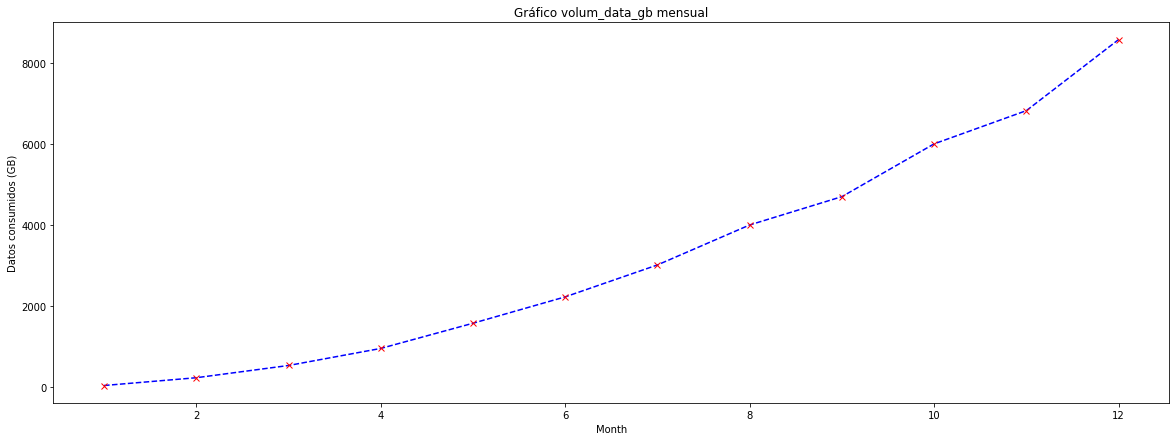

In [75]:
plt.figure(figsize=(20,7))
plt.plot(line_plot['volum_data_gb'], "xr--",c = 'b', mec='r')
plt.title('Gráfico volum_data_gb mensual')
plt.ylabel('Datos consumidos (GB)')
plt.xlabel('Month')
plt.show()

Se evidencia como el consumo de Gigas ha aumentado con el tiempo, dando a entender que la empresa va a la alza, ha crecido con una tendencia lineal mes tras mes en usuarios, y esto ha hecho también que el consumo de datos haya aumentado generando cada vez más ganancias a la compañía, llegando a superar los 8000gb consumidos en el més de diciembre. Ahora bien vamos a estudiar las llamadas.

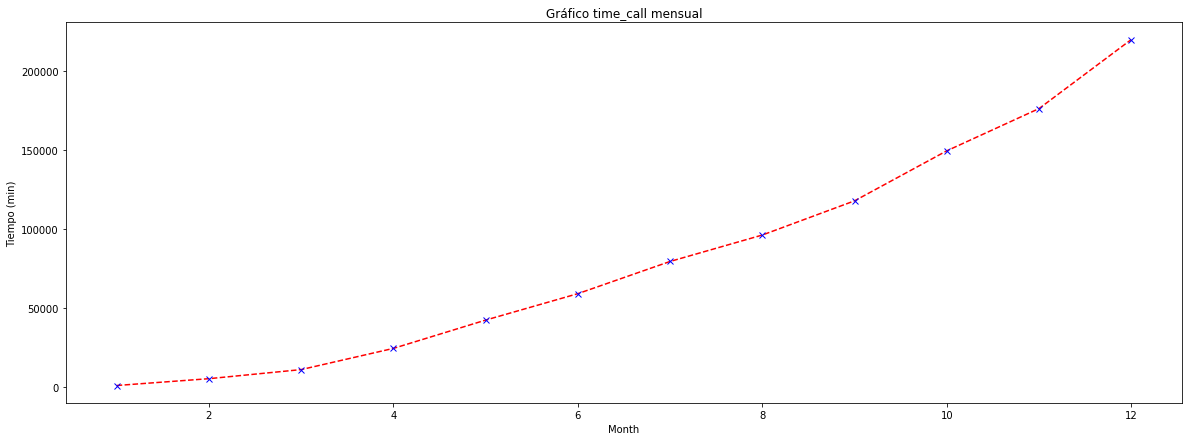

In [76]:
plt.figure(figsize=(20,7))
plt.plot(line_plot['time_call'],"xr--",mec='b')
plt.title('Gráfico time_call mensual')
plt.ylabel('Tiempo (min)')
plt.xlabel('Month')
plt.show()

Se reíte la misma tendencia que con los GB, donde se obseva que incluso se superan los 200000 minutos consumidos en el mes de diciembre los usuarios, una cifra bastante prometedora en lo que a ganancias se refiere. Ahora analizando el número de mensajes enviados:

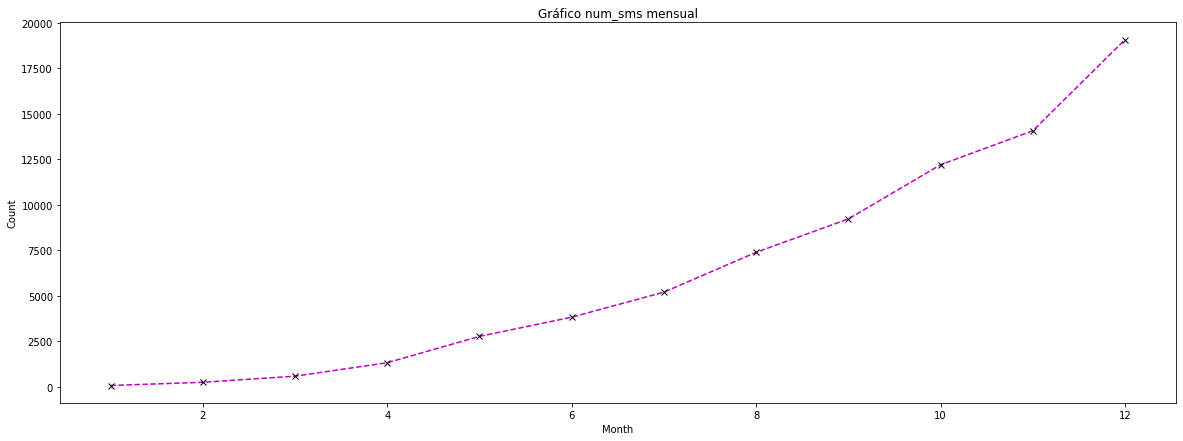

In [77]:
plt.figure(figsize=(20,7))
plt.plot(line_plot['num_sms'],"xr--", c = 'm', mec='0')
plt.title('Gráfico num_sms mensual')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

De nuevo se observa la misma tendiacia, con un alza en diciembre. Sin embargo, en proporción se ve que no se utiliza mucho este servicio. La mayoría de las personas seguro opta por las aplicaciones para este caso. De ahí el incremento en consumo de datos también.

A continuación, se pprocede a realizar el gráfico de el volumen de datos utilizados por todos los usuarios para ver como se distribuyen. Luego se hará segmemtando los planes.

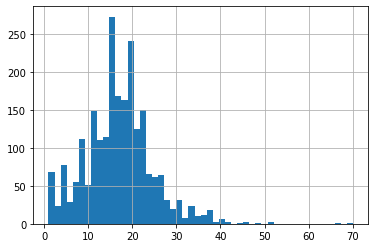

In [78]:
user_perfil_complete['volum_data_gb'].hist(bins = 50)
plt.show()

Como se observa, y como se evidenció en la distribución de los datos, en este caso, la mayoría de media van a gastar unos 15GB o 17GB al mes, en torno a 60 personas no usan este servicio o muy poco, y hay unos casos aislados en la distribución que se van por encima de los 40GB lo cual es mucho para un mes.

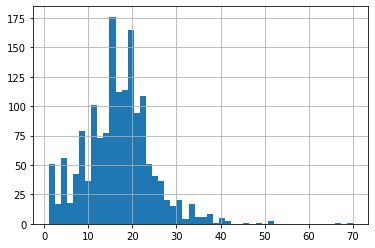

In [79]:
user_perfil_complete[user_perfil_complete['plan'] == 'surf']['volum_data_gb'].hist(bins = 50)
plt.show()

Analizando el plan surf, en cuanto a lo que a llamadas se refiere, podemos ver que como se dijo a yterioememnte la distribución es más amplia, y esto se debe a que es en este plan donde están los casos aislados. Y tenemos picos de datos en 17GB, en torno a los 22GB y luego en los 12GB siendo entonces estas la cifras más comunes para estos usuarios.

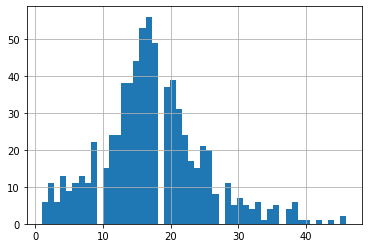

In [80]:
user_perfil_complete[user_perfil_complete['plan'] == 'ultimate']['volum_data_gb'].hist(bins = 50)
plt.show()

Sin embargo, en el plan ultimate, tenemos una distribución más corta, de 0 a casi 50GB al mes, donde la distribución es bastante cercana a una campana de Gauss, con su cuspide en torno a los 17GB. 

Ahora, se procede a analizar, el tiempo de llamada.

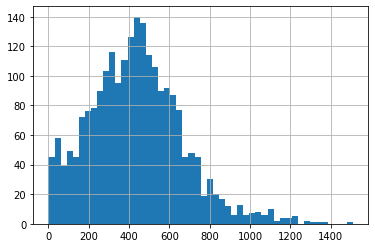

In [81]:
user_perfil_complete['time_call'].hist(bins = 50)
plt.show()

Se evidencia, que la mayoría de las personas usan unos 400min al mes en llamadas en terminos generales.

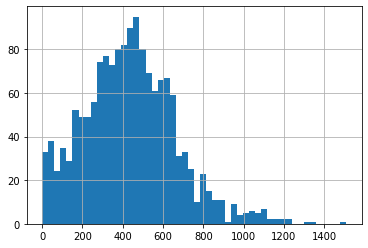

In [82]:
user_perfil_complete[user_perfil_complete['plan'] == 'surf']['time_call'].hist(bins = 50)
plt.show()

Así mismo en el plan Surf, vuelven a verse valores aislados, y unas 60 personas que de plano mo utilizan el servicio de las llamadas.

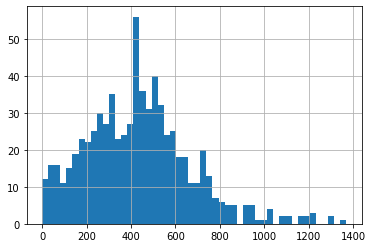

In [83]:
user_perfil_complete[user_perfil_complete['plan'] == 'ultimate']['time_call'].hist(bins = 50)
plt.show()

Del mimso modo en el plan Ultimate, con la diferencia nuevamente de no tener tantos datos de forma aislada.

Ahora, se analizan los mensajes de texto.

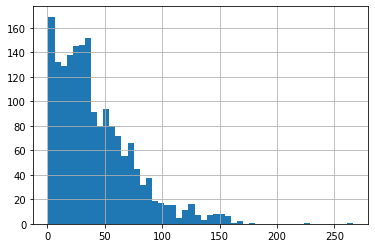

In [84]:
user_perfil_complete['num_sms'].hist(bins = 50)
plt.show()

Como es tendencia a nivel mundial, las personas casi no utilizan mensajes de texto, siendo la gtendencia de 0 a 150 menssajes de texto al mes entre ambos grupos, lo que demuestra una de las razones por las cuales el consumo de datos es tan amplio, y es debido a que se utilizan muchas aplicaciones de mensajería que requieren de este servicio, dejando un poco obsoletos los SMS

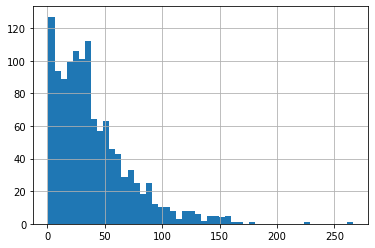

In [85]:
user_perfil_complete[user_perfil_complete['plan'] == 'surf']['num_sms'].hist(bins = 50)
plt.show()

En el plan Surf se continua la tendencia.

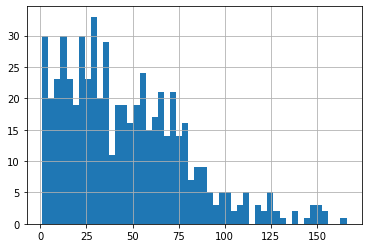

In [86]:
user_perfil_complete[user_perfil_complete['plan'] == 'ultimate']['num_sms'].hist(bins = 50)
plt.show()

Y lo mismo con el plan Ultimate. Aunque se ve que las personas con este p´lan, los usan mas

Ahora, se procede a analizar los pagos de cada usuario.

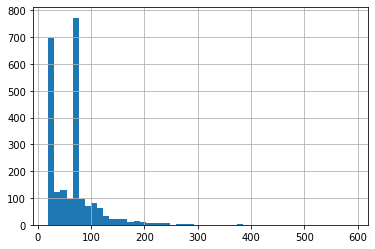

In [87]:
user_perfil_complete['final_cost'].hist(bins = 50)
plt.show()

Vemos dos claros picos, asosciados a cada una de las tarifas de 20USD y 70USD correspondientes a surf y ultimate respectivamente. Además de una distribución de datos bastanet amplia.

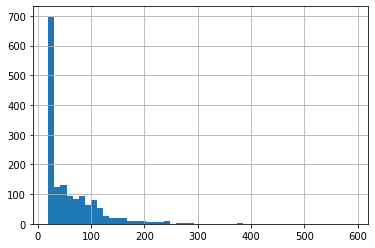

In [88]:
user_perfil_complete[user_perfil_complete['plan'] == 'surf']['final_cost'].hist(bins = 50)
plt.show()

Se observa, que aunque, los valores están en torno a la tarifa del plan, hay algunas personas que incluso pagaron casi 600USD en un mes por el servicio, cosa que es un gasto bastante elevado.

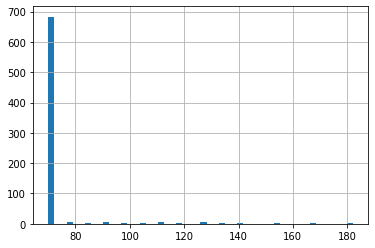

In [89]:
user_perfil_complete[user_perfil_complete['plan'] == 'ultimate']['final_cost'].hist(bins = 50)
plt.show()

Sin embargo, en el plan Ultimate, la distribución de los datos va más a corde a lo que se espera de las personas que adquieren este tipo de servicios, donde unos pocos son los que pagan demás.

**Conclusión intermedia**

Podemos observar que, algunas personas del plan Surf, tendieron a excederse mucho más que las personas del plan Ultimate, en sus servicios. Quizas por no tomar en cuenta que por tener el plan mas económico, no necesariamente iban a gastar menos. Esto calramente iba a influir en la media de los datos, sin embargo la medianas nos daba el valor cercano a al realidad que son unos 40USD para ese plan, haciandonos ver, que no esta tan cerca de Ultimate como parece, es por ello que a continuación se plantean 2 hipótesis, que se resolveran por medio de métodos estdísticos de comparación de distribuciones.

Ahora bién, para analizar, de mejor manera los atípicos y su relevancia, además de ver como se distribuyen las tomas centrales de los datos por plan según cada categoría se creamn los siguientes boxplot

In [90]:
user_perfil_complete.head()

,user_id,month,volum_data_gb,num_call,time_call,num_sms,plan,city,final_cost
0,1000,12.0,2.0,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,8.0,7.0,27.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,9.0,14.0,49.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,10.0,22.0,65.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,11.0,19.0,64.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00


In [91]:
def boxplot_planes(colum):
  fig, ax = plt.subplots(figsize = (10, 5))
  seaborn.set(style='whitegrid')

  seaborn.boxplot(x=user_perfil_complete['plan'],
                  y=user_perfil_complete[colum])
  plt.title(f'Planes vs {colum}')
  plt.show()
          

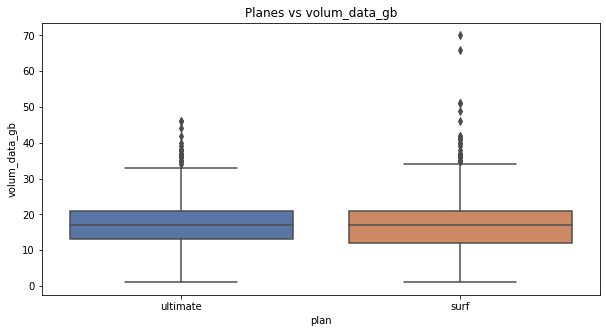

In [92]:
boxplot_planes('volum_data_gb')

Como podemos observar los datos se distribuyen practicamante de la misma manera. Es decir que en ambos planes indistintamente se consume más o menos la misma cantidad de GB, por lo que se puede decir que salen perdidiendo los del plan Surf, ya que tendrán que pagar más que los del plan Ultimate a la alrga, debido a que se exceden del plan y el costo por GB extra es mayor. Además vemos que hay una mayor presencia de valores atípicos en plan Surf.

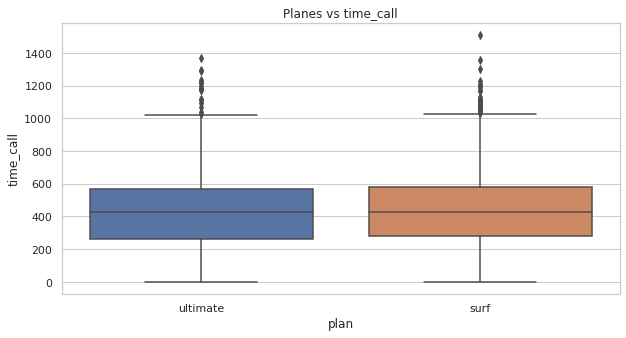

In [93]:
boxplot_planes('time_call')

Así mismo sucede similar con la cantidad de llamadas, vemos que la distribución de los datos es preacticaentente la misma.

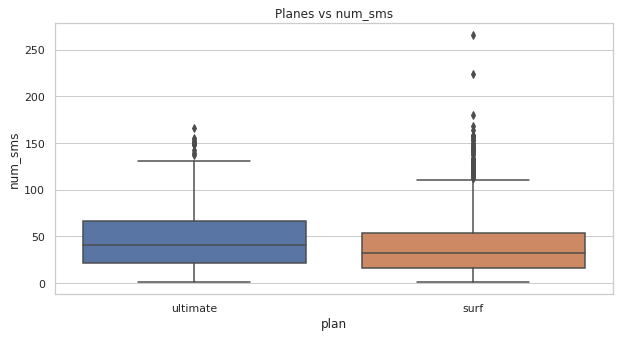

In [94]:
boxplot_planes('num_sms')

En el número de mensajes de texto, podemos evidenciar que los del plan Ultimate los usan más, sin embargo, los del plan surf no, aunque si hay más casos con valores atípicos.

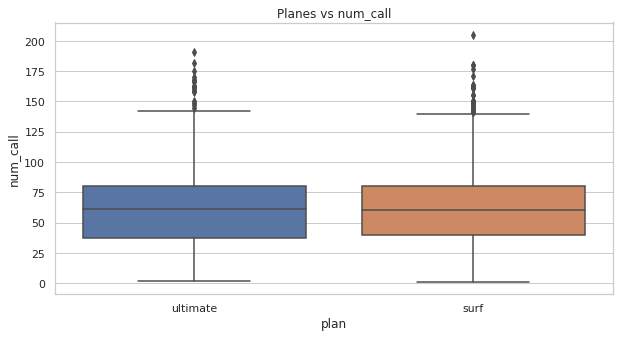

In [95]:
boxplot_planes('num_call')

Por último podemos ver la misma tendencia en cuanto a lo que número de llamadas se refiere.

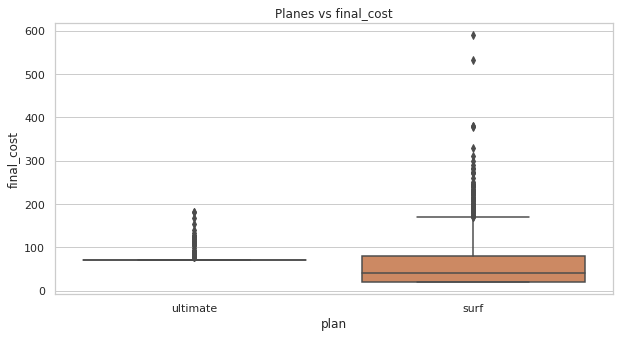

In [96]:
boxplot_planes('final_cost')

Como se observa, practicamente todos los usurarios pagan lo correspondiente a su plan, y solo hay algunos valores atípicos, sin embargo, con el plamn surf, vemos que solo los usuarios del 2do cuartil ganan lo que deberían, de resto, todos exceden sus pagos.

### **Conclusión intermedia**

Como se observa, si estas por debajo del primer cuartil, el plan que más conviene es cuando estas por debajo del segundo cuartil, sin embargo, sino conviene más el plan Ultimate. Sin embargo para la empresa es lo contrarío conviene tener más personas en Surf, para sacer más ganancias, porque lo más probales es que excedan el plan.

### Comprobación de hipótesis

A continuación se presentan las dos preguntas que la empresa quiere determinar:

1. El ingreso promedio de los planes Surf y Ultimate Difiere?
2. El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva
Jersey es diferente al de los usuarios de otras regiones?

Para contestar a ambas, se procede a realizar la hipótesis nula de cada una de ellas, la cual no es más que la predicción de que no hay interacción entre las variables:

Para la primera pregunta, si no hay interacción entre las variables, estas deben diferir, ya que vamos a obtener ingresos diferentes de ambos planes sin importar cual escojan. sindo la hipótesis nula entonces:

1.   El ingreso promedio de los planes Surf y Ultimate no difiere.

Ahora bien, con la segunda pregunta, la hipotesis nula es que sean diferentes, ya que eso indica que sin importar la región tenemos  ganancias distintas por cada una de ellas, por lo tangto la hipótesis nula es:

2.   El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva
Jersey no es diferente al de los usuarios de otras regiones.

Siendo entonces la hipótesis alternativad de cada una que:

1.   El ingreso promedio de los planes Surf y Ultimate Difieren.
2.   El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva
Jersey es diferente al de los usuarios de otras regiones.




Primeramente vamos a convertir todos los NAN a 0

In [97]:
user_perfil_complete['time_call'] = user_perfil_complete['time_call'].fillna(0)
user_perfil_complete['volum_data_gb'] = user_perfil_complete['volum_data_gb'].fillna(0)
user_perfil_complete['num_sms'] = user_perfil_complete['num_sms'].fillna(0)


Luego, segmentamos por cada plan y tomamaos muestras que tengan el mismo tamaño

In [98]:
len(user_perfil_complete[user_perfil_complete['plan'] == 'ultimate'].reset_index().loc[10:210,'time_call'])

201

In [99]:
len(user_perfil_complete[user_perfil_complete['plan'] == 'surf'].reset_index().loc[10:210,'time_call'])

201

Se crea una función que nos permita hacer el análisis de cada grupo muestral dependiendo si se quiere probar la hipótesis de que las medias de dos poblaciones son iguales para muestras dependientes (emparejadas) (`st.ttest_rel(L1, L2)`) o de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas (`st.ttest_ind(L1, L2)`). Se coloca un lpha del 5% por convención.

In [100]:
def hipotesis_nula_muestras(L1, L2, rel = True):

  alpha = 0.05
  if rel == True:
    results = st.ttest_rel(L1, L2) 
  else:
    results = st.ttest_ind(L1, L2)
  print('p-value: ', results.pvalue) 
  if results.pvalue < alpha:     
    print("Rechazamos la hipótesis nula") 
  else:     
    print("No rechazamos la hipótesis nula") 

Para comprobar la primera hiótesis nula, utilizamos el criterio de que solo nos interesa comparar si las medias de las poblaciones estadisticamente pueden ser iguales, además de que lo que gasten las personas según el plan son variables independientes, no dependientes, entre sí, por lo que se escoge utilizar un (`st.ttest_ind(L1, L2)`) para est análisis. Primero se segmentan los datos para obtener ambas poblaciones y luego se calcula el P-valor.

In [101]:
ultimate_time_call = list(user_perfil_complete[user_perfil_complete['plan'] == 'ultimate'].reset_index().loc[:400,'final_cost'])
surf_time_call = list(user_perfil_complete[user_perfil_complete['plan'] == 'surf'].reset_index().loc[:400,'final_cost'])

hipotesis_nula_muestras(ultimate_time_call, surf_time_call, rel = False)

p-value:  9.160695450615378e-10
Rechazamos la hipótesis nula


Como se puede ver, se dice que se debe rechazar la hipótesis nula, por lo que se debe concluir que lo más probable es que efectivamente ambos planes  no ingresen lo mismo al mes.

Ahora, para probar la segunda hipótesis nula, se utilizará el método que nos ayuda a determinar si las medias de dos poblaciones son iguales para muestras dependientes, ya que en este caso, las ciudades, son variables dependientes, mutuamente excluyentes. Primeramente crearemos un DataFrame con las ciudades y los usuarios para luego concatenarlo a nuestra tabla principal `user_perfil_complete` y poder realizar el estudio de la hipótesis.

Una vez concatenado, se procede a realizar el estuddio comprobando que las muestras tiene la misma cantidad de datos.

In [102]:
len(user_perfil_complete[user_perfil_complete['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index().loc[:300,'final_cost'])

301

In [103]:
len(user_perfil_complete[user_perfil_complete['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index().loc[:300,'final_cost'])

301

Segmentamos por todas las ciudades que son `'New York-Newark-Jersey City, NY-NJ-PA MSA'` y las que no lo son y se procede a invocar la función `hipotesis_nula_muestras` para estudiar si vamos a rechazar la hipótesis nula.




In [104]:
user_Newark_Jersey = user_perfil_complete[user_perfil_complete['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index().loc[:300,'final_cost']
user_sin_Newark_Jersey = user_perfil_complete[user_perfil_complete['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index().loc[:300,'final_cost']

In [109]:
hipotesis_nula_muestras(user_Newark_Jersey, user_sin_Newark_Jersey, rel = False)

p-value:  0.012745691935265964
Rechazamos la hipótesis nula


Como vemos, debemos rechazar la hipótesis nula, lo que quiere decir, que efectivamente, es que en ambas ciudades no se pague lo mismo, aceptando entonces la hipótesis de que el consumo es distinto entre Newark-Jersey y el resto de ciudades del DataSet.



### Conclusión general


Primeramente, se lograron corregir los errores en los datos, referentes a los minutos en las llamadas, en los cuales, habia tiempos inferiores a 1 minuto que debian ser redondeados.

Así mismo, se modificaron los tipos de datos, para que los calculos posteriores resultasen más sencillos.

Así mismo, se evidenció que las medias de cada una de las distribuciones de los planes se asemejan bastante, lo que a simple vista nos podría hacer pensar que los usuarios pagan los mismo, independientemente del plan, sin enbargo las medianas y la distribución estandar, nos hacen ver esto no es del todo cierto. 

Ya que, en el caso del plan Surf la desviaicón estandar es bastanet grande, haciando ver que los datos se distribuyen de una fomr amas alargada y no tanto hacia arriba. Al contrario de los que optan por el plan ultimate.

En los gráfico se vió la tendencia violatil del plan Surf con respecto al Ultimate, donde hubo personas que exdieron por mucho su limiete de datos, Quizas por no tomar en cuenta que por tener el plan mas económico, no necesariamente iban a gastar menos. Esto calramente iba a influir en la media de los datos, sin embargo la medianas nos daba el valor cercano a al realidad que son unos 40USD para ese plan, haciandonos ver, que no esta tan cerca de Ultimate como parece, es por ello que a continuación se plantean 2 hipótesis, que se resolveran por medio de métodos estdísticos de comparación de distribuciones. Llamadas y mensajes dispersando mucho la distribución.

Por último se evidenció que, ambas hipótesis nulas fueron rechazadas. Arrojando que lo más probable es que efectivamente ambos planes no ingresen lo mismo al mes y que, es muy improbable que en ambas ciudades se pague lo mismo, aceptando entonces la hipótesis de que el consumo es distinto entre Newark-Jersey y el resto de ciudades del DataSet.

Siendo entonces la hipótesis alternativad de cada una que:

1.   El ingreso promedio de los planes Surf y Ultimate Difiere.
2.   El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva
Jersey es diferente al de los usuarios de otras regiones.


